In [87]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from datetime import datetime
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [88]:
loan_raw = pd.read_csv("loan2019.csv")

In [89]:
loan = loan_raw[["time","amount","unit"]]

In [90]:
def normalize(z):
    x = z
    x = x.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(np.vstack(x))
    return x_scaled

In [91]:
loan['time']=pd.to_datetime(loan.time)

In [92]:
def month(df3):

    for i in range(2,4):
        
        
        df3[df3.index.month==i].plot(title="Loan Amounts")
        

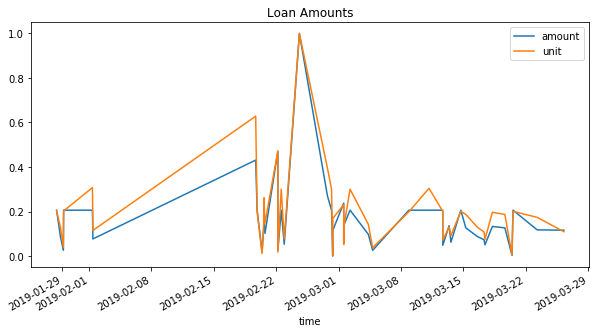

In [93]:
plt.rcParams['figure.figsize']=[10,5]
loan[['amount','unit']]=normalize(loan[['amount','unit']])
loan.set_index('time').plot(title="Loan Amounts")

<Figure size 1224x936 with 0 Axes>

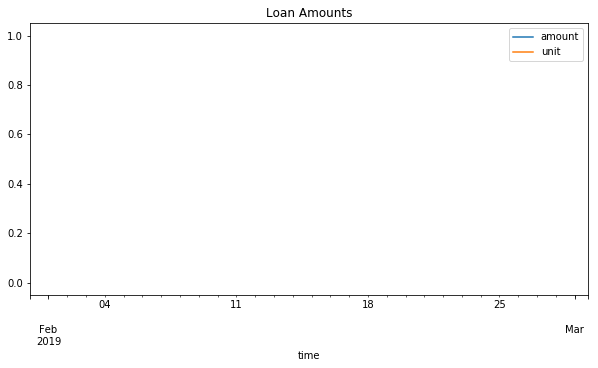

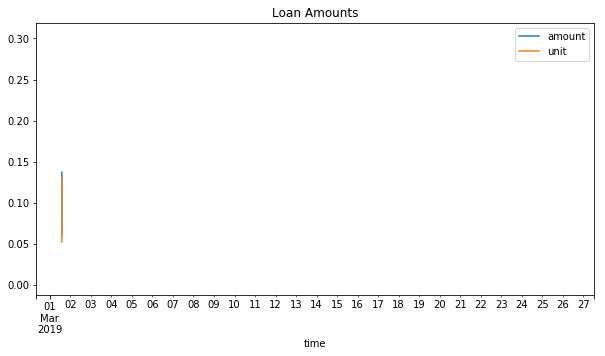

In [94]:
plt.figure(figsize=(17, 13))

loan_min = loan.resample('1min', on='time').mean()

loan[['amount','unit']]=normalize(loan[['amount','unit']])
month(loan_min)

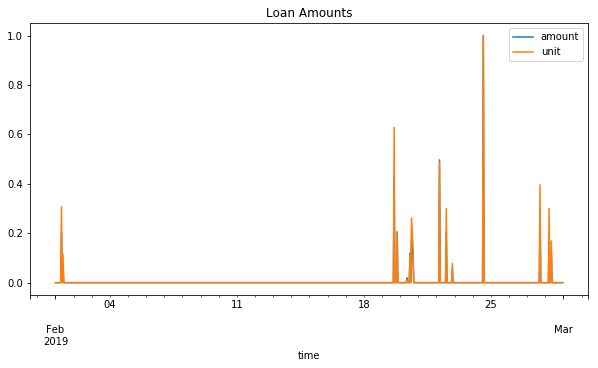

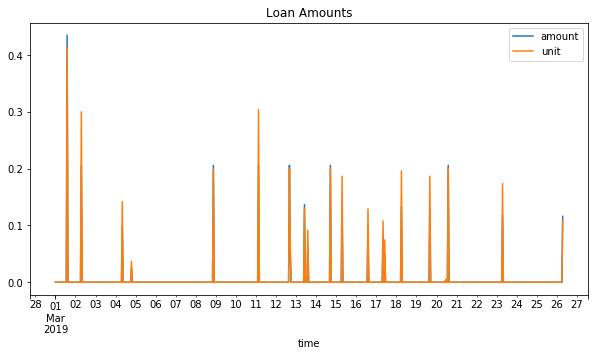

In [95]:

loan_hour = loan.resample('60min', on='time').sum()

month(loan_hour)

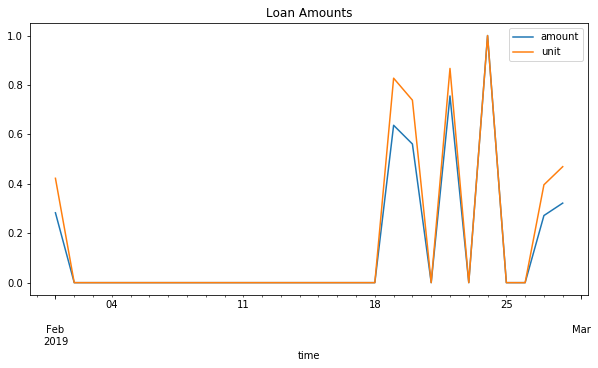

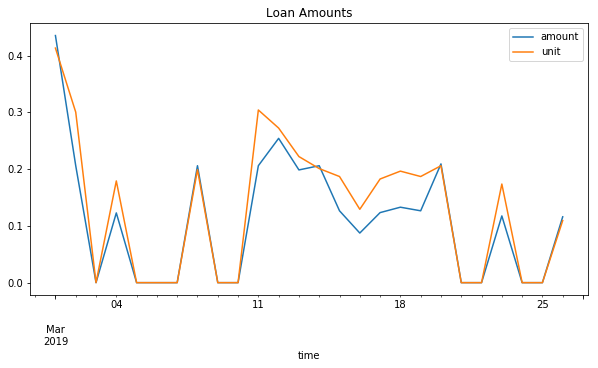

In [96]:

loan_day = loan.resample('1d', on='time').sum()
loan[['amount','unit']]=normalize(loan[['amount','unit']])
month(loan_day)

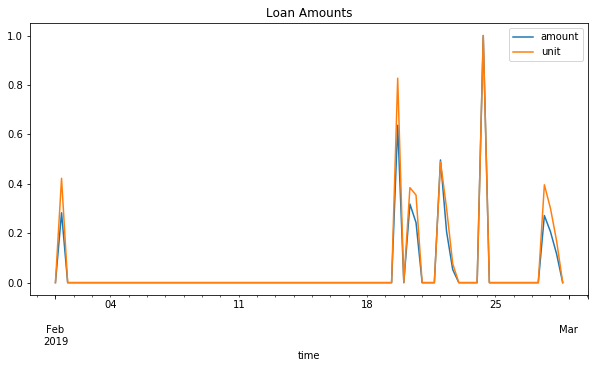

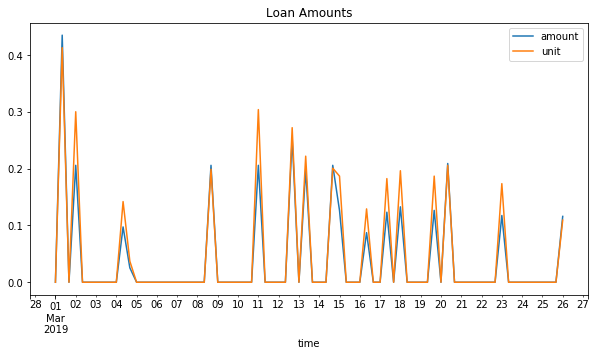

In [97]:

loan_3H = loan.resample('8H', on='time').sum()
loan[['amount','unit']]=normalize(loan[['amount','unit']])
loan_3H[['amount','unit']]=normalize(loan_3H[['amount','unit']])
month(loan_3H)

In [98]:

loan['hour'] = loan.time.dt.hour